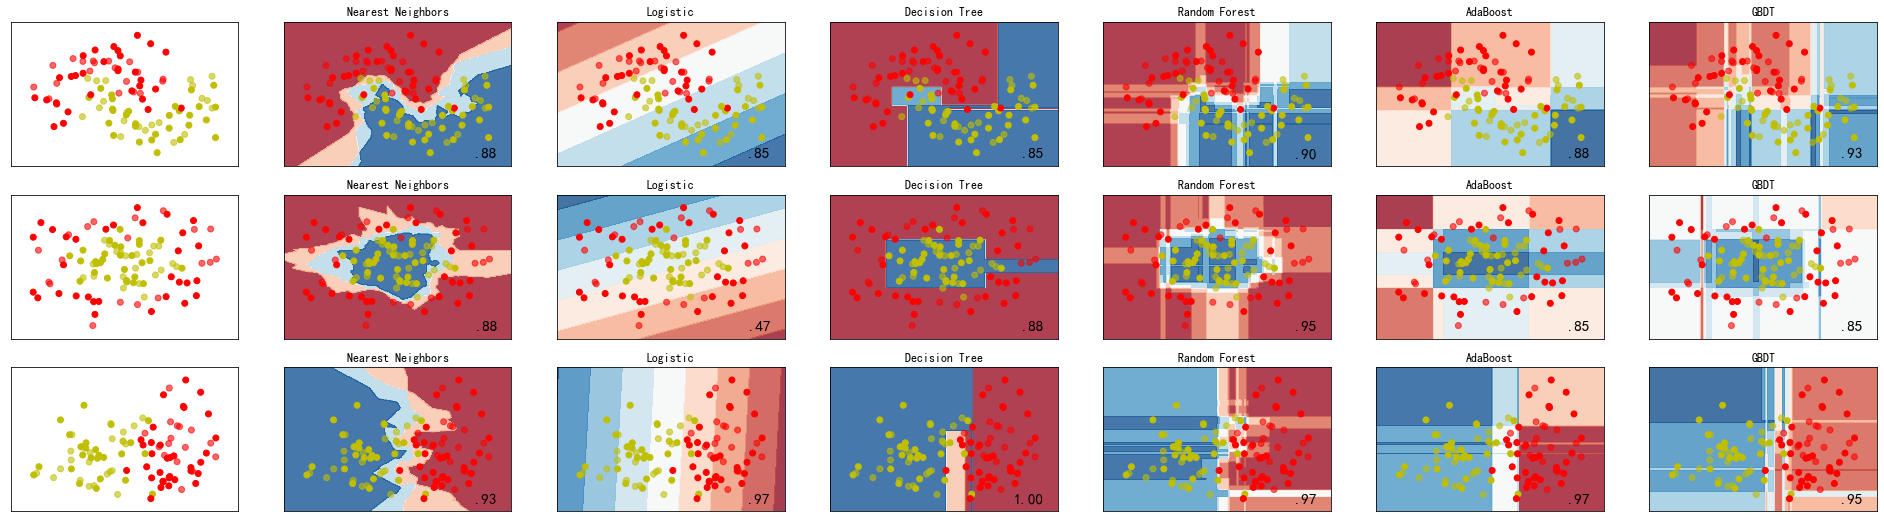

In [2]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
# Author:ZhengzhengLiu
#分类算法比较
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.datasets import make_moons,make_circles,make_classification    #生成月牙形、圆形和分类型的数据集
#解决中文显示问题
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
X,y = make_classification(n_features=2,n_redundant=0,n_informative=2,
                          random_state=1,n_clusters_per_class=1)
rng = np.random.RandomState(2)
X+=2*rng.uniform(size=X.shape)
linearly_separable = (X,y)
datasets = [make_moons(noise=0.3,random_state=0),
            make_circles(noise=0.2,factor=0.4,random_state=1),
            linearly_separable]
names = ["Nearest Neighbors", "Logistic","Decision Tree", "Random Forest", "AdaBoost", "GBDT"]
classifiers = [
    KNeighborsClassifier(3),
    LogisticRegressionCV(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5,n_estimators=10,max_features=1),
    AdaBoostClassifier(n_estimators=10,learning_rate=1.5),
    GradientBoostingClassifier(n_estimators=10,learning_rate=1.5)]
#画图
figure = plt.figure(figsize=(27,9),facecolor="w")
i = 1
h = .02     #步长
for ds in datasets:
    X,y = ds
    X = StandardScaler().fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.4)
    x_min,x_max = X[:,0].min()-.5,X[:,0].max()+.5
    y_min,y_max = X[:,1].min()-.5,X[:,1].max()+.5
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["r","b","y"])
    ax = plt.subplot(len(datasets),len(classifiers)+1,i)
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright)
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6)
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i+=1
    #画每个算法的图
    for name,clf in zip(names,classifiers):
        ax = plt.subplot(len(datasets),len(classifiers)+1,i)
        clf.fit(X_train,y_train)
        score = clf.score(X_test,y_test)
        if hasattr(clf,"decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]
        Z = Z.reshape(xx.shape)
        ax.contourf(xx,yy,Z,cmap=cm,alpha=.8)
        ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright)
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max()-.3,yy.min()+.3,("%.2f"%score).lstrip("0"),
                size=15,horizontalalignment="right")
        i+=1 
#展示图
figure.subplots_adjust(left=.02,right=.98)
plt.savefig("分类算法比较.png")
plt.show()